In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from sklearn.externals import joblib
%matplotlib inline
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
X = pd.read_csv('/mnt/ml-team/minerva/open-solutions/home-credit/files/unzipped_data/application_train.csv')
X.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X_ext = X[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']]

In [4]:
# X_ext = X_ext.fillna(0)

In [5]:
for function_name in ['min', 
                      'max', 
                      'sum', 
                      'mean', 
                      'var', 
                      'median', 
                      'std', 
                      'nanmedian', 
                      'nanmean'
                     ]:
    X_ext['EXT_SRC_{}'.format(function_name)] = eval('np.{}'.format(function_name))(X_ext.drop(columns=['TARGET']), axis=1)

/mnt/ml-team/homes/paulina.knut/env_minerva/lib/python3.5/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/mnt/ml-team/homes/paulina.knut/env_minerva/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median for 197922 results
  r = func(a, **kwargs)


In [6]:
X_ext.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET,EXT_SRC_min,EXT_SRC_max,EXT_SRC_sum,EXT_SRC_mean,EXT_SRC_var,EXT_SRC_median,EXT_SRC_std,EXT_SRC_nanmedian,EXT_SRC_nanmean
0,0.083037,0.262949,0.139376,1,0.083037,0.262949,0.831347,0.277116,0.057411,0.201162,0.222662,0.211912,0.239360
1,0.311267,0.622246,NaN,0,0.311267,0.622246,1.867026,0.746810,0.277552,NaN,0.514651,0.568448,0.649057
2,NaN,0.555912,0.729567,0,0.555912,0.729567,2.570958,1.028383,0.500763,NaN,0.680671,0.705119,0.895206
3,NaN,0.650442,NaN,0,0.650442,0.650442,1.951325,0.975663,0.253845,NaN,0.532824,0.650442,0.789428
4,NaN,0.322738,NaN,0,0.322738,0.322738,0.968215,0.484107,0.062496,NaN,0.277071,0.322738,0.385355


In [7]:
X_ext['EXT_SRC_weighted3'] = (X.EXT_SOURCE_1*2+X.EXT_SOURCE_2*3+X.EXT_SOURCE_3*4)/9
X_ext['EXT_SRC_weighted2'] = (X.EXT_SOURCE_1*3+X.EXT_SOURCE_2*4+X.EXT_SOURCE_3*2)/9
X_ext['EXT_SRC_weighted1'] = (X.EXT_SOURCE_1*4+X.EXT_SOURCE_2*2+X.EXT_SOURCE_3*3)/9

/mnt/ml-team/homes/paulina.knut/env_minerva/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/mnt/ml-team/homes/paulina.knut/env_minerva/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/mnt/ml-team/homes/paulina.knut/env_minerva/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [8]:
X_ext.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET,EXT_SRC_min,EXT_SRC_max,EXT_SRC_sum,EXT_SRC_mean,EXT_SRC_var,EXT_SRC_median,EXT_SRC_std,EXT_SRC_nanmedian,EXT_SRC_nanmean,EXT_SRC_weighted3,EXT_SRC_weighted2,EXT_SRC_weighted1
0,0.083037,0.262949,0.139376,1,0.083037,0.262949,0.831347,0.277116,0.057411,0.201162,0.222662,0.211912,0.239360,0.168047,0.175517,0.141797
1,0.311267,0.622246,NaN,0,0.311267,0.622246,1.867026,0.746810,0.277552,NaN,0.514651,0.568448,0.649057,NaN,NaN,NaN
2,NaN,0.555912,0.729567,0,0.555912,0.729567,2.570958,1.028383,0.500763,NaN,0.680671,0.705119,0.895206,NaN,NaN,NaN
3,NaN,0.650442,NaN,0,0.650442,0.650442,1.951325,0.975663,0.253845,NaN,0.532824,0.650442,0.789428,NaN,NaN,NaN
4,NaN,0.322738,NaN,0,0.322738,0.322738,0.968215,0.484107,0.062496,NaN,0.277071,0.322738,0.385355,NaN,NaN,NaN


In [9]:
X_ext_corr = abs(X_ext.corr())

In [10]:
X_ext_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET               1.000000
EXT_SRC_weighted3    0.236289
EXT_SRC_weighted1    0.228995
EXT_SRC_median       0.226818
EXT_SRC_weighted2    0.226534
EXT_SRC_mean         0.222664
EXT_SRC_nanmean      0.221576
EXT_SRC_nanmedian    0.218044
EXT_SRC_std          0.213052
EXT_SRC_sum          0.208105
EXT_SRC_max          0.196876
EXT_SRC_min          0.185266
EXT_SRC_var          0.183363
EXT_SOURCE_3         0.178919
EXT_SOURCE_2         0.160472
EXT_SOURCE_1         0.155317
Name: TARGET, dtype: float64

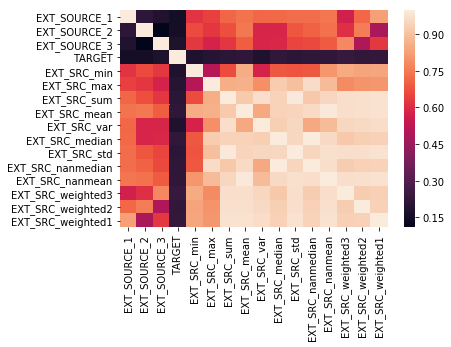

In [11]:
sns.heatmap(X_ext_corr, 
            xticklabels=X_ext_corr.columns,
            yticklabels=X_ext_corr.columns)

Tree

In [12]:
X_train, X_test = train_test_split(X_ext)

In [13]:
Y_train = X_train['TARGET']
Y_test = X_test['TARGET']

X_train = X_train.drop(columns='TARGET')
X_test = X_test.drop(columns='TARGET')

In [14]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [15]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

print("R^2 on the train set:")
print(clf.score(X_train, Y_train))

print("\nR^2 on the test set:")
print(clf.score(X_test, Y_test))

R^2 on the train set:
0.997515533336513

R^2 on the test set:
0.8555113296391685


In [16]:
X_train.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SRC_min,EXT_SRC_max,EXT_SRC_sum,EXT_SRC_mean,EXT_SRC_var,EXT_SRC_median,EXT_SRC_std,EXT_SRC_nanmedian,EXT_SRC_nanmean,EXT_SRC_weighted3,EXT_SRC_weighted2,EXT_SRC_weighted1
264562,0.000000,0.693432,0.692559,0.692559,0.693432,2.771983,1.108793,0.576292,0.000000,0.727108,0.693432,0.961066,0.000000,0.000000,0.000000
171278,0.000000,0.715202,0.819318,0.715202,0.819318,3.069040,1.227616,0.708232,0.000000,0.800055,0.809686,1.075963,0.000000,0.000000,0.000000
127576,0.000000,0.647992,0.859924,0.647992,0.859924,3.015831,1.206333,0.689629,0.000000,0.789811,0.824868,1.060256,0.000000,0.000000,0.000000
29967,0.307364,0.254644,0.179822,0.179822,0.307364,1.229015,0.409672,0.117422,0.281004,0.316970,0.294184,0.352480,0.233105,0.255590,0.253134
260505,0.735436,0.615655,0.657784,0.615655,0.735436,3.359965,1.119988,0.862228,0.735436,0.830266,0.735436,1.000299,0.660997,0.664944,0.682934


In [17]:
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns.values)

In [18]:
feature_importances.sort_values(ascending=False)

EXT_SRC_mean         0.125772
EXT_SRC_nanmean      0.105857
EXT_SRC_nanmedian    0.097544
EXT_SOURCE_2         0.094269
EXT_SRC_min          0.090740
EXT_SRC_std          0.084243
EXT_SRC_var          0.081717
EXT_SRC_sum          0.078634
EXT_SRC_max          0.072344
EXT_SOURCE_3         0.041997
EXT_SOURCE_1         0.035050
EXT_SRC_weighted2    0.023857
EXT_SRC_weighted1    0.023772
EXT_SRC_weighted3    0.023144
EXT_SRC_median       0.021060
dtype: float64